In [1]:
import hashlib
import pandas as pd
from model import dataClassifier

In [2]:
# Import Dataset
class_noise_dataset = pd.read_csv('dataset.csv', sep='$')
class_noise_dataset.dropna()

# Remove Trailing Spaces in Column Names
class_noise_dataset.columns = [col.strip() for col in class_noise_dataset.columns]

# Duplicate Columns Removed
class_noise_dataset = class_noise_dataset.loc[:,~class_noise_dataset.columns.duplicated()].copy()

In [3]:
passed = 0
failed = 0
for index, line in class_noise_dataset.iterrows():
    val = class_noise_dataset.loc[index, 'class_value']
    if val == 1:
        passed += 1
    elif val == 0:
        failed += 1
    else:
        print('FAILED')
        break
        
print("Before Class Noise Handling:\n")
print(f"Passed: {passed}")
print(f"Failed: {failed}")
print(f"Total: {passed + failed}")

Before Class Noise Handling:

Passed: 2497
Failed: 2497
Total: 4994


In [4]:
class CRowInfo:
    def __init__(self):
        iHash = 0
        iVerdict = 0

In [5]:
def generateHash():
    for i, strInputLine in class_noise_dataset.iterrows(): 
        strCodeLine = str(strInputLine['contents'])
        iHash = int(hashlib.sha1(strCodeLine.encode('utf-8')).hexdigest(), 16) % (10 ** 8)
        class_noise_dataset.loc[i, 'hashed_line'] = iHash
        class_noise_dataset.loc[i, 'class_noise'] = class_noise_dataset.loc[i, 'class_value']
    class_noise_dataset['hashed_line'] = class_noise_dataset['hashed_line'].astype(int)
    class_noise_dataset['class_noise'] = class_noise_dataset['class_noise'].astype(int)

In [6]:
rowDictionary = {}

In [7]:
def generateDictionary():
    iLineIndex = 0
    for index, strInputLine in class_noise_dataset.iterrows():  
            if iLineIndex != 0:            
                lineObject = CRowInfo()
                lineObject.iHash = int(strInputLine['hashed_line'])
                lineObject.iVerdict = strInputLine['class_noise']
                # check if the line already exists in the dictionary
                if lineObject.iHash in rowDictionary:
                    old_line_verdict = rowDictionary[lineObject.iHash].iVerdict
                    # check if the new occurrence has a different verdict and that lineObject has a verdict of 1, 
                    # if so, then we relabel the dictionary line by replacing it with the lineObject
                    if (old_line_verdict != lineObject.iVerdict) and (lineObject.iVerdict == 1):
                          rowDictionary[lineObject.iHash] = lineObject
                    else:
                        continue #do nothing and keep the lineObject as is in the dictionary
                else:                
                    rowDictionary[lineObject.iHash] = lineObject
            iLineIndex += 1

In [8]:
generateHash()
generateDictionary()
len(rowDictionary)

1559

In [9]:
class_noise_sorted = class_noise_dataset

for i, strInputLine in class_noise_sorted.iterrows():
    for hashKey, oneLineObject in rowDictionary.items():
        if class_noise_sorted['hashed_line'][i] == hashKey:
            class_noise_sorted.loc[i, 'class_noise'] = oneLineObject.iVerdict
            break
            
class_noise_sorted = class_noise_sorted.reset_index()
class_noise_sorted = class_noise_sorted.drop(['class_value', 'class_name', 'hashed_line'], axis=1)
class_noise_sorted = class_noise_sorted.drop('index', axis=1)
class_noise_sorted.to_csv('class_noise_cleaned.csv', index=False)
class_noise_sorted

,id,,.,a,if,return,throw,void,},!,...,"| """,| |,"} """,} ',} :,} <,~ /,~ dp0node,contents,class_noise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,++ b/README.md,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"1,23 @@",1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,This plugin downloads/installs Node and NPM lo...,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"It's supposed to work on Windows, OS X and Linux.",1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,++ b/frontend-maven-plugin/src/main/java/com/g...,1
4990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,},1
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"39,6 @@ public final class BowerMojo extends A...",0
4992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,this.additionalEnvironment = additiona...,0


In [10]:
passed = 0
failed = 0
for index, line in class_noise_sorted.iterrows():
    val = class_noise_sorted.loc[index, 'class_noise']
    if val == 1:
        passed += 1
    elif val == 0:
        failed += 1
    else:
        print('FAILED')
        break
        
print("After Class Noise Handling:\n")
print(f"Passed: {passed}")
print(f"Failed: {failed}")
print(f"Total: {passed + failed}")

After Class Noise Handling:

Passed: 3591
Failed: 1403
Total: 4994


## Uncleaned Results

Accuracy: 82.88 %
Precision: 86.46 %
Recall: 78.42 %
F-Score: 82.24 %


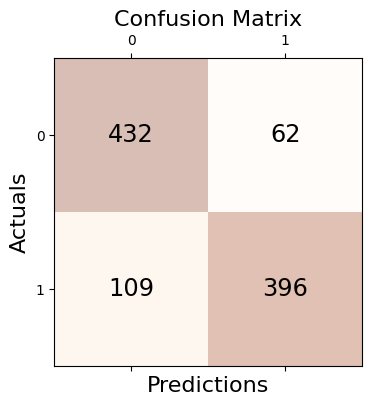

In [11]:
un_cleaned = pd.read_csv('dataset.csv', sep='$')
un_cleaned = un_cleaned.drop(['class_name', 'contents'], axis=1)
un_cleaned.dropna()
un_cleaned.columns = [col.strip() for col in un_cleaned.columns]
un_cleaned = un_cleaned.loc[:,~un_cleaned.columns.duplicated()].copy()

X = un_cleaned.iloc[:, 0:1940]
y = un_cleaned.iloc[:, -1]

unCleanedObj = dataClassifier(X, y)
unCleanedObj.dataAnalysis(100)

unCleaned_acc = round(unCleanedObj.accuracy * 100, 2)
unCleaned_pre = round(unCleanedObj.precision * 100, 2)
unCleaned_rec = round(unCleanedObj.recall * 100, 2)
unCleaned_fscore = round(unCleanedObj.f_score * 100, 2)

print(f"Accuracy: {unCleaned_acc} %")
print(f"Precision: {unCleaned_pre} %")
print(f"Recall: {unCleaned_rec} %")
print(f"F-Score: {unCleaned_fscore} %")

## Class Noise Cleaned Results

Accuracy: 94.59 %
Precision: 97.74 %
Recall: 94.79 %
F-Score: 96.24 %


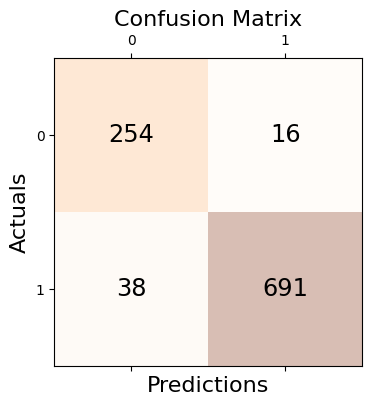

In [12]:
cn_cleaned = pd.read_csv('class_noise_cleaned.csv')
cn_cleaned = cn_cleaned.drop(['contents'], axis=1)

X = cn_cleaned.iloc[:, 0:1940]
y = cn_cleaned.iloc[:, -1]

classNoiseObj = dataClassifier(X, y)
classNoiseObj.dataAnalysis(100)

cleaned_acc = round(classNoiseObj.accuracy * 100, 2)
cleaned_pre = round(classNoiseObj.precision * 100, 2)
cleaned_rec = round(classNoiseObj.recall * 100, 2)
cleaned_fscore = round(classNoiseObj.f_score * 100, 2)

print(f"Accuracy: {cleaned_acc} %")
print(f"Precision: {cleaned_pre} %")
print(f"Recall: {cleaned_rec} %")
print(f"F-Score: {cleaned_fscore} %")